# 项目：信用卡客户风险预测数据

## 简介

数据集包含客户多个特征，可以用于预测客户是否可以成功申请到信用卡。此数据集里很多特征需要进行清洗，适合练习数据清洗，并构建逻辑回归模型。

变量含义：
- `checking_status`：现有支票账户的状态
- `duration`：贷款期限，以月计算
- `credit_history`：信用历史，包括信用记录、按时还款、延迟还款、关键账户等信息
- `purpose`：贷款用途
- `credit_amount`：贷款金额
- `savings_status`：储蓄账户/债券的状态
- `employment`：目前的就业状况，以年计算
- `installment_commitment`：每月还款额占可支配收入的百分比
- `personal_status`：性别和婚姻状况信息
- `other_parties`：其他债务人/担保人

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./credit_customers.csv")
original_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## **评估和清理数据**

In [3]:
cleaned_data = original_data.copy()

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### 1. 检查缺失值

先检查缺失值，可以根据需求选择填充或删除缺失值。

In [5]:
cleaned_data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

没有缺失值

### 2. 检查异常值

通过IQR（四分位距）来检测异常值，并根据该规则删除异常的记录。

In [6]:
print("Summary statistics for credit_amount(贷款金额):")
print(cleaned_data['credit_amount'].describe())
print("Summary statistics for duration(贷款期限):")
print(cleaned_data['duration'].describe())

Summary statistics for credit_amount(贷款金额):
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64
Summary statistics for duration(贷款期限):
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64


In [7]:
# 检测并处理异常值（使用IQR方法检测异常值）
Q1 = cleaned_data['credit_amount'].quantile(0.25)
Q3 = cleaned_data['credit_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_data = cleaned_data[(cleaned_data['credit_amount'] >= lower_bound) & (cleaned_data['credit_amount'] <= upper_bound)]

In [8]:
q1 = cleaned_data['duration'].quantile(0.25)
q3 = cleaned_data['duration'].quantile(0.75)
IQR_duration = q3 - q1
lower_bound_duration = q1 - 1.5 * IQR_duration
upper_bound_duration = q3 + 1.5 * IQR_duration
cleaned_data = cleaned_data[(cleaned_data['duration'] >= lower_bound_duration) & (cleaned_data['duration'] <= upper_bound_duration)]

### 3. 处理分类变量

对分类变量使用`LabelEncoder`，将其转化为数字。

In [9]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder

In [10]:
# categorical_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties']

# # 使用LabelEncoder对分类变量进行编码
# le = LabelEncoder()
# for col in categorical_columns:
#     cleaned_data[col] = le.fit_transform(cleaned_data[col])

如果需要更复杂的表示，可以使用`One-Hot Encoding`。

In [11]:
# One-Hot
# credit_data = pd.get_dummies(credit_data, columns=categorical_columns)

### 4. 标准化数值特征

使用StandardScaler对数值型特征进行标准化，使其符合标准正态分布，这对逻辑回归模型很有帮助。

标准化数值型变量（如`credit_amount`, `installment_commitment`, `duration`等）

In [12]:
# numerical_columns = ['duration', 'credit_amount', 'installment_commitment']
# scaler = StandardScaler()
# cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

In [13]:
# cleaned_data.head()

### 5. 检查重复数据

In [14]:
duplicate_rows = cleaned_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


没有重复的数据

In [15]:
# 删除重复数据
# cleaned_data.drop_duplicates(inplace=True)

### 6. 处理异常类别

对于分类变量，检查其唯一值，决定是否需要合并或删除异常类别。

In [16]:
# for col in categorical_columns:
#     # 查看每个类别的频率分布
#     # print(f"\nFrequency distribution for {col}: {cleaned_data[col].value_counts()}")
#     # 查看每个分类变量的唯一值
#     print(f"Unique values for {col}: {cleaned_data[col].unique()}")

## **数据可视化**

### 1. 变量分布分析

绘制`credit_amount`和`duration`变量的直方图和箱线图，以查看其分布情况。

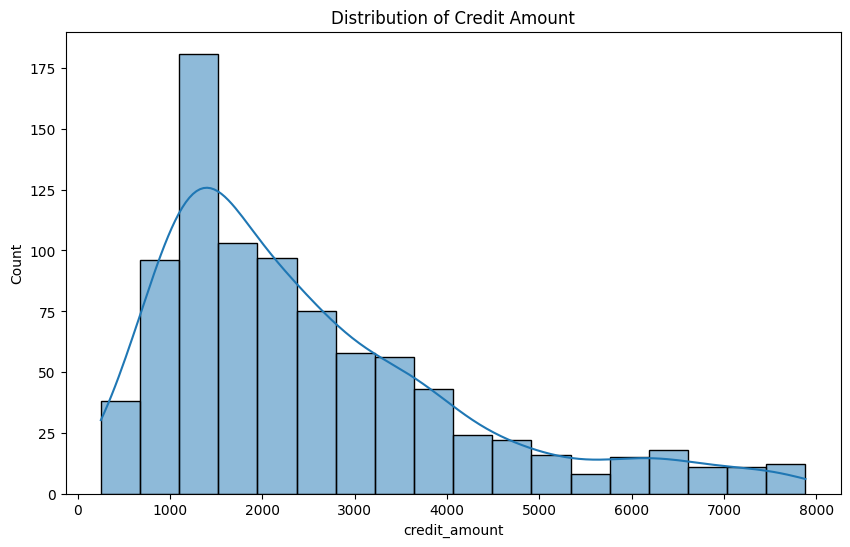

In [17]:
# 直方图查看credit_amount的分布
plt.figure(figsize=(10,6))
sns.histplot(cleaned_data['credit_amount'], kde=True)
plt.title('Distribution of Credit Amount')
plt.show()

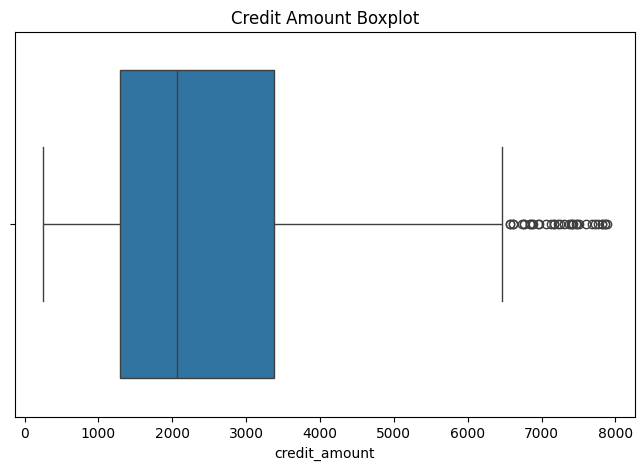

In [18]:
# 箱线图查看credit_amount的分布
plt.figure(figsize=(8,5))
sns.boxplot(x=cleaned_data['credit_amount'])
plt.title('Credit Amount Boxplot')
plt.show()

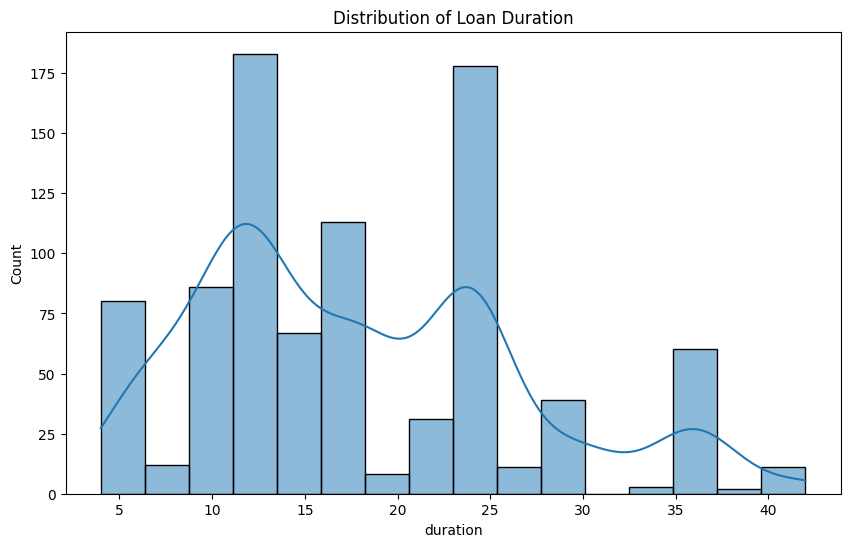

In [19]:
# 直方图查看duration的分布
plt.figure(figsize=(10,6))
sns.histplot(cleaned_data['duration'], kde=True)
plt.title('Distribution of Loan Duration')
plt.show()

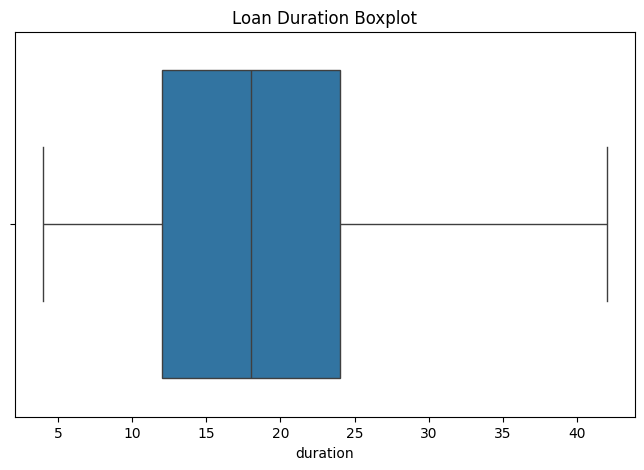

In [20]:
# 箱线图查看duration的分布
plt.figure(figsize=(8,5))
sns.boxplot(x=cleaned_data['duration'])
plt.title('Loan Duration Boxplot')
plt.show()

### 2. 相关性分析

查看数值变量之间的相关性，例如`credit_amount`和`duration`，使用相关矩阵和热力图可视化。

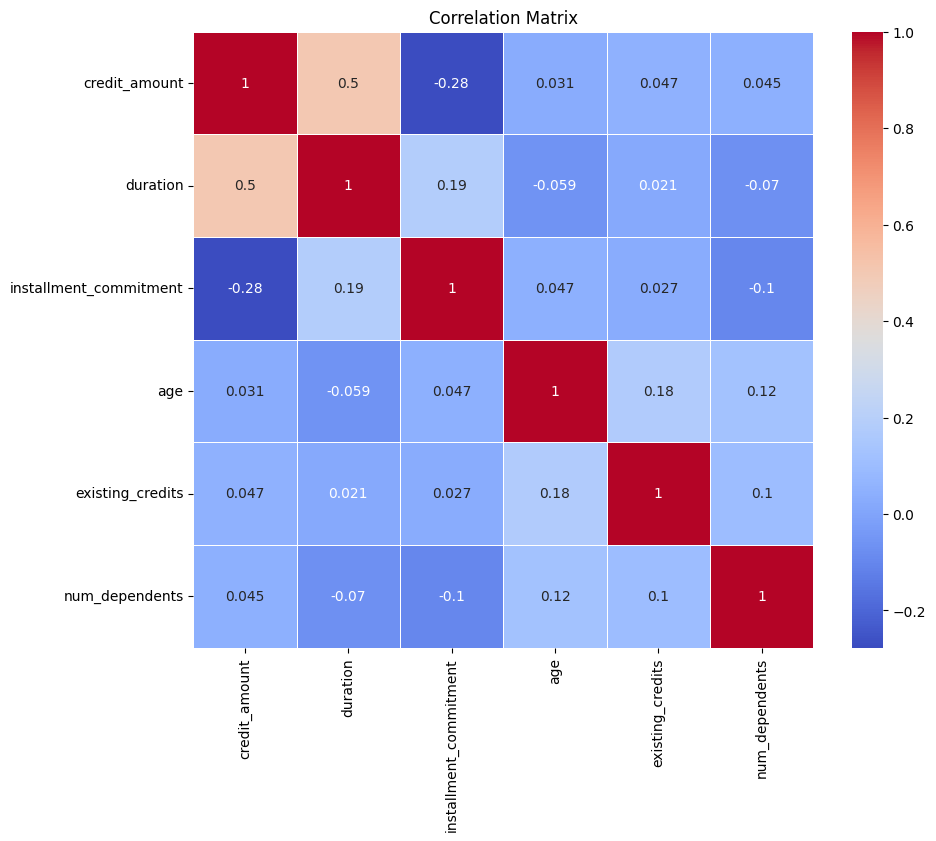

In [21]:
# 相关矩阵
corr_matrix = cleaned_data[['credit_amount', 'duration', 'installment_commitment', 'age', 
                           'existing_credits', 'num_dependents']].corr()

# 使用热力图显示相关性
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 3. 目标变量分析

分析目标变量`class`（是否批准申请），并通过堆积柱状图查看与其他特征的关系。

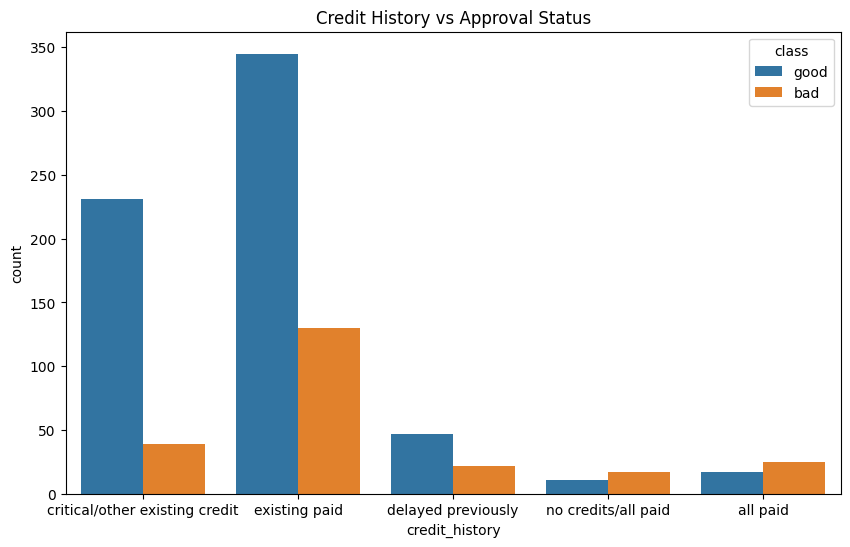

In [22]:
# 查看credit_history与目标变量class的关系
plt.figure(figsize=(10,6))
sns.countplot(x='credit_history', hue='class', data=cleaned_data)
plt.title('Credit History vs Approval Status')
plt.show()

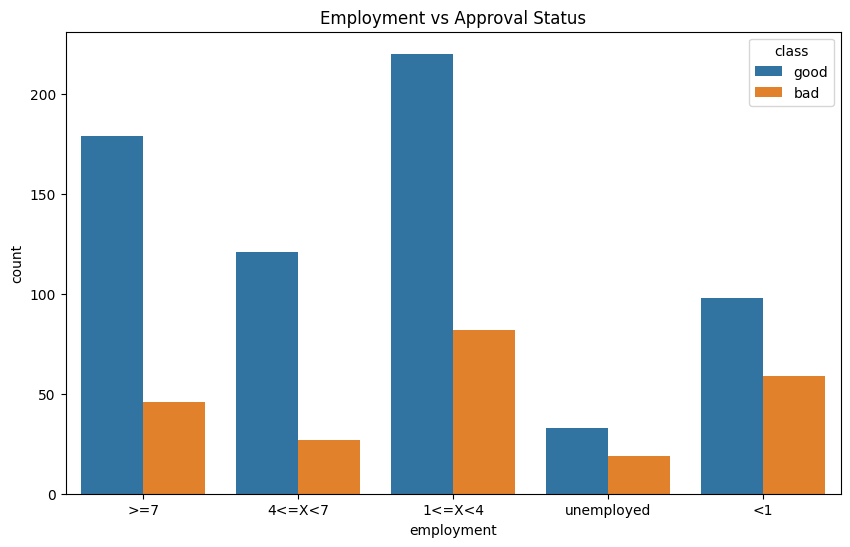

In [23]:
# 查看employment与目标变量class的关系
plt.figure(figsize=(10,6))
sns.countplot(x='employment', hue='class', data=cleaned_data)
plt.title('Employment vs Approval Status')
plt.show()

### 4. 分组分析

按类别进行分组，查看如`credit_history`、`employment`等特征的统计信息。

In [24]:
# 按credit_history进行分组，查看各组贷款金额的统计特征
credit_history_grouped = cleaned_data.groupby('credit_history')['credit_amount'].describe()
print(credit_history_grouped)

                                count         mean          std    min  \
credit_history                                                           
all paid                         42.0  2533.071429  2024.918371  339.0   
critical/other existing credit  270.0  2618.174074  1762.783414  250.0   
delayed previously               69.0  2989.594203  1849.176878  585.0   
existing paid                   475.0  2382.715789  1540.067708  276.0   
no credits/all paid              28.0  3202.321429  1715.984439  426.0   

                                   25%     50%      75%     max  
credit_history                                                   
all paid                        1214.5  1698.5  3422.50  7824.0  
critical/other existing credit  1292.0  2043.0  3526.00  7855.0  
delayed previously              1555.0  2375.0  4297.00  7678.0  
existing paid                   1282.5  1979.0  3078.00  7882.0  
no credits/all paid             1686.0  3109.0  4250.75  6289.0  


In [25]:
# 按employment进行分组，查看各组贷款期限的统计特征
employment_grouped = cleaned_data.groupby('employment')['duration'].describe()
print(employment_grouped)

            count       mean       std  min   25%   50%   75%   max
employment                                                         
1<=X<4      302.0  17.546358  8.666361  6.0  12.0  15.0  24.0  42.0
4<=X<7      148.0  18.925676  9.404074  4.0  12.0  18.0  24.0  42.0
<1          157.0  17.407643  8.146854  4.0  12.0  18.0  24.0  42.0
>=7         225.0  18.728889  8.762354  6.0  12.0  18.0  24.0  42.0
unemployed   52.0  17.423077  8.103125  6.0  12.0  18.0  24.0  42.0


### 5. 分组特征的统计特征

查看如`credit_history`和`employment`等特征的分组统计信息。

In [26]:
# 按credit_history分组，查看贷款金额的均值和中位数
credit_history_stats = cleaned_data.groupby('credit_history')['credit_amount'].agg(['mean', 'median'])
print(credit_history_stats)

                                       mean  median
credit_history                                     
all paid                        2533.071429  1698.5
critical/other existing credit  2618.174074  2043.0
delayed previously              2989.594203  2375.0
existing paid                   2382.715789  1979.0
no credits/all paid             3202.321429  3109.0


In [27]:
# 按employment分组，查看贷款期限的均值和中位数
employment_stats = cleaned_data.groupby('employment')['duration'].agg(['mean', 'median'])
print(employment_stats)

                 mean  median
employment                   
1<=X<4      17.546358    15.0
4<=X<7      18.925676    18.0
<1          17.407643    18.0
>=7         18.728889    18.0
unemployed  17.423077    18.0
